# Transfer Learning Tutorial : Unsupervised Instance-Based Approaches

In this tutorial, we are going to apply instance-based approaches to perform transfer learning.


In [1]:
import numpy as np
import scipy
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
import skfda
from skfda.datasets import fetch_growth
from skfda.exploratory.visualization import FPCAPlot
from skfda.preprocessing.dim_reduction.feature_extraction import FPCA
from skfda.representation.basis import BSpline, Fourier, Monomial

In [3]:
import skfda.preprocessing.smoothing.kernel_smoothers as ks
import skfda.preprocessing.smoothing.validation as val
%matplotlib inline

   # Functional Data Analysis

In [4]:
df=pd.read_csv('YeastY.csv')

In [40]:
df=df.rename(columns={'Unnamed: 0':'time'}).set_index('time')

In [41]:
df

,alpha0,alpha7,alpha14,alpha21,alpha28,alpha35,alpha42,alpha49,alpha56,alpha63,alpha70,alpha77,alpha84,alpha91,alpha98,alpha105,alpha112,alpha119
time,,,,,,,,,,,,,,,,,,
1,-0.36,-0.42,0.29,-0.14,-0.19,-0.52,0.04,0.04,0.37,0.24,0.13,0.22,0.04,-0.24,-0.22,-0.10,0.22,0.61
2,1.04,0.19,0.47,-1.03,-0.63,-0.68,0.10,-0.02,0.53,0.68,0.51,-0.20,-0.34,-0.59,-0.31,-0.25,0.11,0.44
5,-0.30,-0.45,0.75,0.37,0.27,-0.28,-0.16,-0.13,-0.56,-0.28,0.11,0.30,0.22,0.08,0.07,-0.02,0.11,-0.10
8,-0.46,0.12,-0.06,-0.76,-0.70,-0.79,-0.20,-0.06,0.82,0.36,0.68,-0.13,0.20,-0.32,0.04,0.57,0.17,0.53
9,-1.35,-0.86,-0.22,-0.38,-0.65,-0.79,0.02,0.60,1.38,1.59,1.03,0.99,0.11,-0.39,-0.86,-0.41,-0.20,0.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,-0.24,-0.40,0.97,0.62,0.60,-0.11,-0.04,-0.70,-0.40,-0.24,0.25,0.30,0.46,-0.13,-0.06,-0.31,-0.33,-0.24
789,-0.41,-0.57,1.15,0.69,0.61,0.00,-0.22,-0.50,-0.43,-0.33,0.22,0.64,0.42,-0.09,-0.03,-0.50,-0.08,-0.57
790,-0.79,-0.25,1.18,0.84,0.19,-0.11,-0.42,-0.56,-0.36,-0.12,0.68,0.80,0.08,-0.24,-0.14,-0.27,-0.32,-0.19


### SUMMARY

In [130]:
df.describe()

,alpha0,alpha7,alpha14,alpha21,alpha28,alpha35,alpha42,alpha49,alpha56,alpha63,alpha70,alpha77,alpha84,alpha91,alpha98,alpha105,alpha112,alpha119
count,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000
mean,-0.225111,-0.129483,0.104354,0.066550,0.054428,0.005720,0.048266,-0.095480,-0.049908,-0.023708,0.129096,0.148598,0.144428,-0.119483,0.040000,0.007878,-0.043450,-0.071199
std,0.728585,0.608051,0.598775,0.590698,0.449574,0.433494,0.497152,0.439254,0.496079,0.463918,0.536000,0.495065,0.375312,0.331425,0.364035,0.316733,0.376804,0.384856
min,-2.420000,-2.710000,-1.960000,-2.290000,-1.700000,-2.060000,-2.240000,-2.170000,-2.170000,-1.750000,-2.070000,-2.130000,-0.990000,-1.150000,-1.110000,-1.230000,-1.430000,-1.640000
25%,-0.580000,-0.400000,-0.197500,-0.260000,-0.140000,-0.197500,-0.220000,-0.330000,-0.307500,-0.280000,-0.180000,-0.160000,-0.080000,-0.290000,-0.160000,-0.190000,-0.280000,-0.280000
50%,-0.240000,-0.120000,0.090000,0.000000,0.070000,0.030000,0.080000,-0.050000,-0.050000,-0.050000,0.040000,0.040000,0.095000,-0.160000,0.020000,-0.015000,-0.030000,-0.090000
75%,0.090000,0.107500,0.417500,0.440000,0.280000,0.247500,0.360000,0.157500,0.220000,0.190000,0.370000,0.360000,0.300000,0.020000,0.210000,0.170000,0.180000,0.110000
max,4.440000,3.070000,2.130000,1.980000,1.550000,1.650000,1.600000,2.220000,1.640000,2.090000,2.740000,2.710000,1.930000,1.320000,1.520000,1.300000,1.350000,1.280000


In [150]:
f = df.to_numpy().astype(float)

In [151]:
f=f.T

In [153]:
time = np.linspace(0,1,542)

In [152]:
f.shape

(18, 542)

### plotting our dataset

In [185]:
fd = skfda.FDataGrid(
    data_matrix=f,
)


C:\Users\beret\AppData\Local\Temp\ipykernel_21220\3870694525.py:2: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



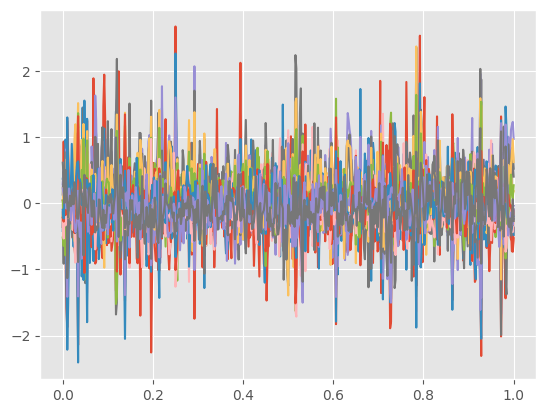

In [186]:
%matplotlib inline
fd.plot().show()

### Smoot technics

Here we show the general cross validation scores for different values of the
parameters given to the different smoothing methods. Currently we have
three kernel smoothing methods implemented: Nadaraya Watson, Local Linear
Regression and K Nearest Neighbors (k-NN)

The smoothing parameter for k-NN is the number of neighbors. We will choose
this parameter between 1 and 23 in this example.

In [157]:
n_neighbors = np.arange(1, 24)

In [158]:
scale_factor = (
    (fd.domain_range[0][1] - fd.domain_range[0][0])
    / len(fd.grid_points[0])
)


The smoothing parameter for Nadaraya Watson and Local Linear Regression is
a bandwidth parameter, with the same units as the domain of the function.
As we want to compare the results of these smoothers with k-NN, with uses
as the smoothing parameter the number of neighbors, we want to use a
comparable range of values. In this case, we know that our grid points are
equispaced, so a given bandwidth ``B`` will include
``B * N / D`` grid points, where ``N`` is the total number of grid points
and ``D`` the size of the whole domain range. Thus, if we pick
``B = n_neighbors * D / N``, ``B`` will include ``n_neighbors`` grid points
and we could compare the results of the different smoothers.

In [160]:

bandwidth = n_neighbors * scale_factor

# K-nearest neighbours kernel smoothing.
knn = val.SmoothingParameterSearch(
    ks.KNeighborsSmoother(),
    n_neighbors,
)
knn.fit(fd)
knn_fd = knn.transform(fd)

# Local linear regression kernel smoothing.
llr = val.SmoothingParameterSearch(
    ks.LocalLinearRegressionSmoother(),
    bandwidth,
)
llr.fit(fd)
llr_fd = llr.transform(fd)

# Nadaraya-Watson kernel smoothing.
nw = val.SmoothingParameterSearch(
    ks.NadarayaWatsonSmoother(),
    bandwidth,
)
nw.fit(fd)
nw_fd = nw.transform(fd)

The plot of the mean test scores for all smoothers is shown below.
As the X axis we will use the neighbors for all the smoothers in order
to compare k-NN with the others, but remember that the bandwidth is
this quantity scaled by ``scale_factor``!


C:\Users\beret\AppData\Local\Temp\ipykernel_21220\1519704246.py:19: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



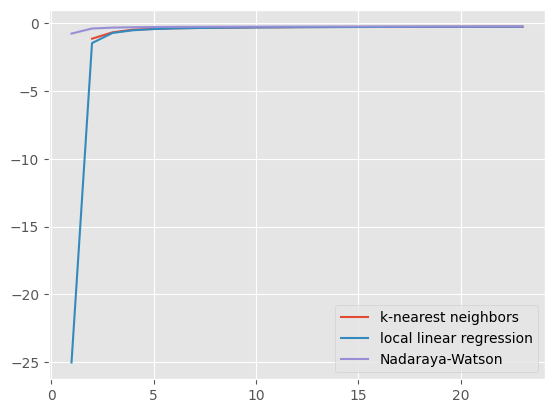

In [165]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(
    n_neighbors,
    knn.cv_results_['mean_test_score'],
    label='k-nearest neighbors',
)
ax.plot(
    n_neighbors,
    llr.cv_results_['mean_test_score'],
    label='local linear regression',
)
ax.plot(
    n_neighbors,
    nw.cv_results_['mean_test_score'],
    label='Nadaraya-Watson',
)
ax.legend()
fig.show()

We can plot the smoothed curves corresponding to the 11th element of the
data set (this is a random choice) for the three different smoothing
methods.


C:\Users\beret\AppData\Local\Temp\ipykernel_21220\2655630827.py:20: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



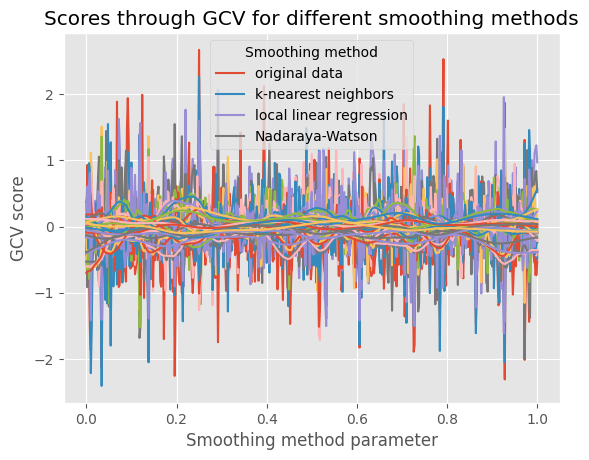

In [170]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Smoothing method parameter')
ax.set_ylabel('GCV score')
ax.set_title('Scores through GCV for different smoothing methods')

fd[:10,].plot(fig=fig)
knn_fd[:10,].plot(fig=fig)
llr_fd[:10,].plot(fig=fig)
nw_fd[:10,].plot(fig=fig)
ax.legend(
    [
        'original data',
        'k-nearest neighbors',
        'local linear regression',
        'Nadaraya-Watson',
    ],
    title='Smoothing method',
)
fig.show()

C:\Users\beret\AppData\Local\Temp\ipykernel_21220\3463459685.py:1: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



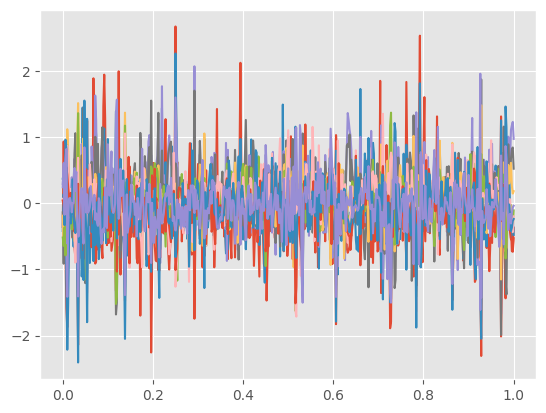

In [171]:
fd[:10,].plot().show()

We can also appreciate the effects of undersmoothing and oversmoothing in
the following plots.


In [17]:
fd_us = ks.NadarayaWatsonSmoother(
    smoothing_parameter=2 * scale_factor,
).fit_transform(fd[50])
fd_os = ks.NadarayaWatsonSmoother(
    smoothing_parameter=15 * scale_factor,
).fit_transform(fd[50])

Under-smoothed

 C:\Users\beret\AppData\Local\Temp\ipykernel_21220\3749016748.py:2: UserWarning:Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


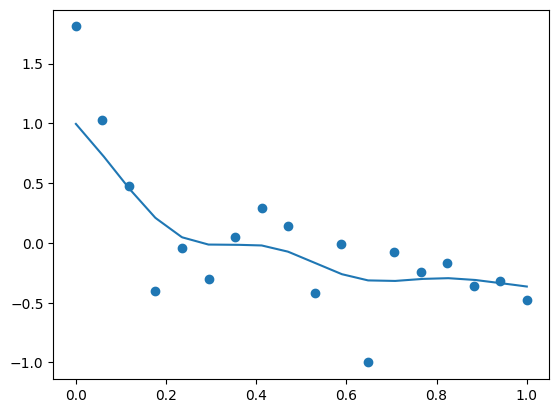

In [18]:
fig = fd[50].scatter(s=0.5)
fd_us.plot(fig=fig).show()

Over-smoothed

 C:\Users\beret\AppData\Local\Temp\ipykernel_21220\54118661.py:2: UserWarning:Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


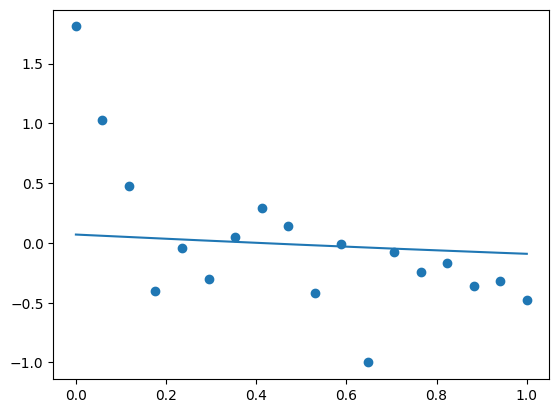

In [19]:
fig = fd[50].scatter(s=0.5)
fd_os.plot(fig=fig).show()

# FDA

In [106]:
from fdasrsf import fPCA, time_warping, fdawarp, fdahpca

In [109]:
f = df.to_numpy().astype(float)

In [122]:
time = np.linspace(0,1,len(f))

Initializing...
Compute Karcher Mean of 18 function in SRSF space...
updating step: r=1
updating step: r=2
updating step: r=3
updating step: r=4
updating step: r=5
updating step: r=6
updating step: r=7
updating step: r=8
updating step: r=9
updating step: r=10
updating step: r=11
updating step: r=12
updating step: r=13
updating step: r=14
updating step: r=15
updating step: r=16
updating step: r=17
updating step: r=18
updating step: r=19
updating step: r=20
maximal number of iterations is reached


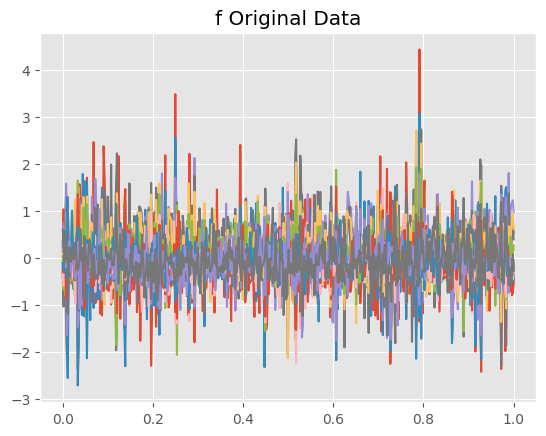

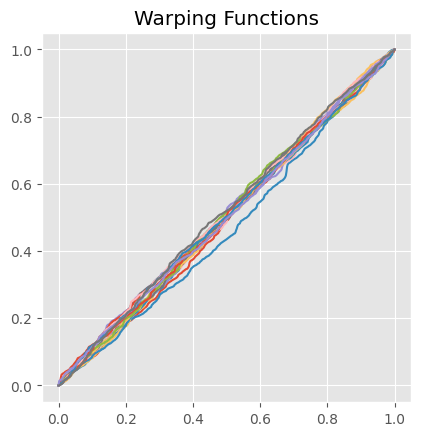

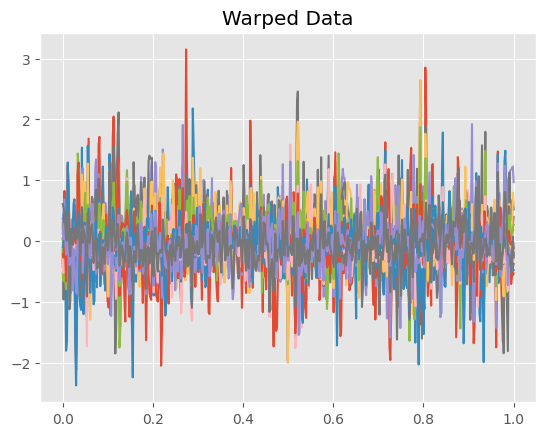

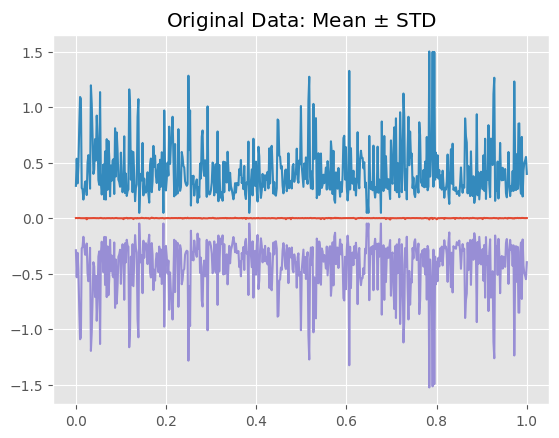

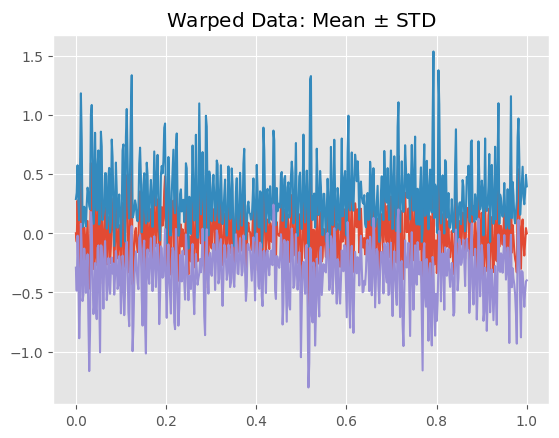

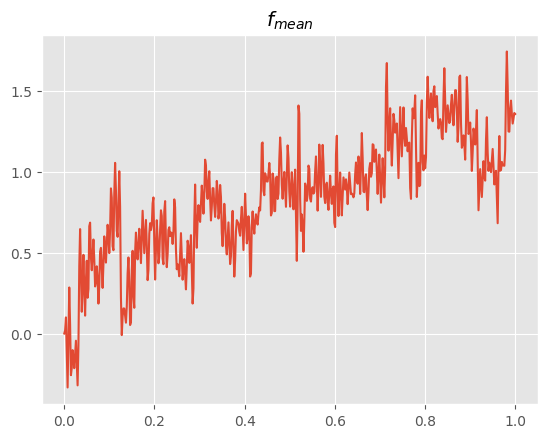

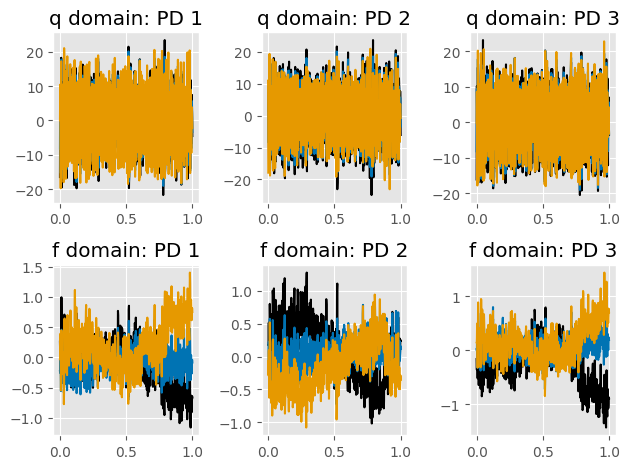

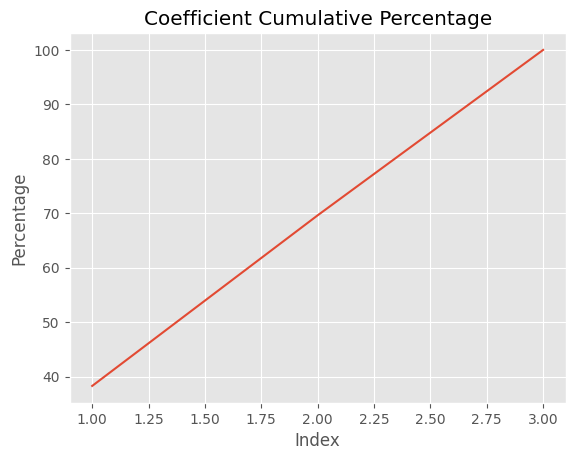

In [123]:
# Functional Alignment
# Align time-series
warp_f = time_warping.fdawarp(f, time)
warp_f.srsf_align()

warp_f.plot()

# Functional Principal Components Analysis

# Define the FPCA as a vertical analysis
fPCA_analysis = fPCA.fdavpca(warp_f)

# Run the FPCA on a 3 components basis 
fPCA_analysis.calc_fpca(no=3)
fPCA_analysis.plot()

In [128]:
import plotly.graph_objects as go

# Plot of the 3 functions
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(y=fPCA_analysis.f_pca[:50,0,0], mode='lines', name="PC1"))
fig.add_trace(go.Scatter(y=fPCA_analysis.f_pca[:50,0,1], mode='lines', name="PC2"))
fig.add_trace(go.Scatter(y=fPCA_analysis.f_pca[:50,0,2], mode='lines', name="PC3"))

fig.update_layout(
    title_text='<b>Principal Components Analysis Functions</b>', title_x=0.5,
)

fig.show()

In [129]:

# Coefficients of PCs against regions
fPCA_coef = fPCA_analysis.coef

# Plot of PCs against regions
fig = go.Figure(data=go.Scatter(x=fPCA_coef[:,0], y=fPCA_coef[:,1], mode='markers+text', text=df.columns))

fig.update_traces(textposition='top center')

fig.update_layout(
    autosize=False,
    width=800,
    height=700,
    title_text='<b>Function Principal Components Analysis on 2018 French Temperatures</b>', title_x=0.5,
    xaxis_title="PC1",
    yaxis_title="PC2",
)
fig.show()

C:\Users\beret\AppData\Local\Temp\ipykernel_21220\1208114925.py:3: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



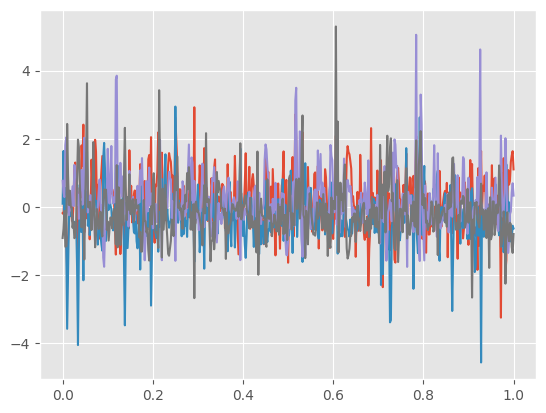

In [172]:
fpca_discretized = FPCA(n_components=4)
fpca_discretized.fit(fd)
fpca_discretized.components_.plot().show()

In [173]:
fpca.components_.coefficients

array([[-0.00312934, -0.03817553, -0.35432484, -0.84357934,  0.14501949,
        -0.37138507,  0.04902161],
       [-0.07102254, -0.40916842, -0.1972445 ,  0.21316233,  0.85648102,
         0.08707561,  0.04529385],
       [ 0.04120356, -0.84662849, -0.23113193,  0.06831593, -0.47049062,
        -0.02684791,  0.03675863],
       [-0.15104904, -0.3132447 ,  0.85111408, -0.31969029,  0.10111816,
         0.01416183,  0.20503522]])

In [174]:
fpca_discretized.inverse_transform

<bound method FPCA.inverse_transform of FPCA(n_components=4,
     weights=array([0.00077018, 0.00200246, 0.00184843, 0.00184843, 0.00184843,
       0.00184843, 0.00184843, 0.00184843, 0.00184843, 0.00184843,
       0.00184843, 0.00184843, 0.00184843, 0.00184843, 0.00184843,
       0.00184843, 0.00184843, 0.00184843, 0.00184843, 0.00184843,
       0.00184843, 0.00184843, 0.00184843, 0.00184843, 0.00184843,
       0.00184843, 0.00184843, 0.00184843, 0.00184...
       0.00184843, 0.00184843, 0.00184843, 0.00184843, 0.00184843,
       0.00184843, 0.00184843, 0.00184843, 0.00184843, 0.00184843,
       0.00184843, 0.00184843, 0.00184843, 0.00184843, 0.00184843,
       0.00184843, 0.00184843, 0.00184843, 0.00184843, 0.00184843,
       0.00184843, 0.00184843, 0.00184843, 0.00184843, 0.00184843,
       0.00184843, 0.00184843, 0.00184843, 0.00184843, 0.00184843,
       0.00200246, 0.00077018]))>

C:\Users\beret\AppData\Local\Temp\ipykernel_21220\2791573103.py:4: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



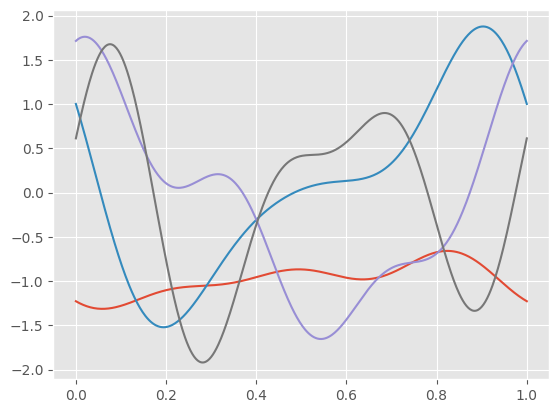

In [176]:
basis_fd = fd.to_basis(BSpline(n_basis=7))
fpca = FPCA(n_components=4, components_basis=Fourier(n_basis=7))
fpca.fit(basis_fd)
fpca.components_.plot().show()

In [177]:
np.cumsum(fpca.explained_variance_ratio_)

array([0.78411504, 0.9127754 , 0.96008603, 0.98131654])

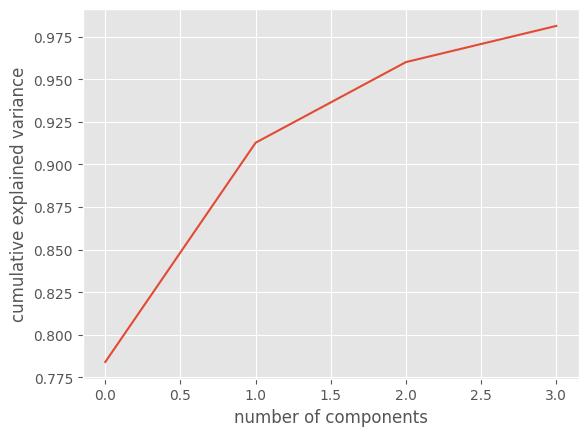

In [178]:
plt.plot(np.cumsum(fpca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

C:\Users\beret\AppData\Local\Temp\ipykernel_21220\2791573103.py:4: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



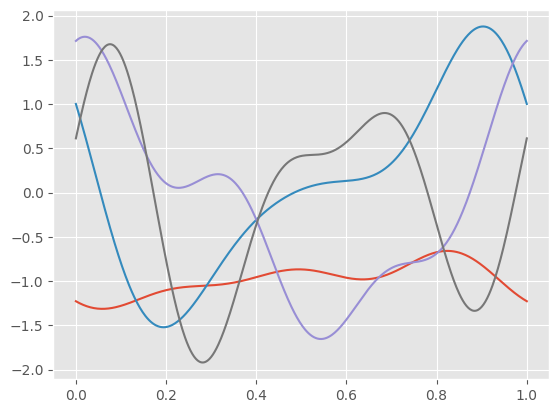

In [179]:
basis_fd = fd.to_basis(BSpline(n_basis=7))
fpca = FPCA(n_components=4, components_basis=Fourier(n_basis=7))
fpca.fit(basis_fd)
fpca.components_.plot().show()

In [97]:
import plotly.express as px

In [103]:
fpca_obj = fpca_gauss(Y = fd, npc = 2)
#> Warning: fpca_gauss convergence not reached. Try increasing maxiter.
if (requireNamespace("ggplot2", quietly = TRUE) &&
requireNamespace("cowplot", quietly = TRUE)) {
library(ggplot2)
plot(fpca_obj)
}

SyntaxError: invalid syntax (843501790.py, line 3)

# Clustering

In [54]:
from skfda import datasets
from skfda.exploratory.visualization.clustering import (
    ClusterMembershipLinesPlot,
    ClusterMembershipPlot,
    ClusterPlot,
)
from skfda.ml.clustering import FuzzyCMeans, KMeans

In [183]:
kmeans = KMeans(n_clusters=4, random_state=2)
kmeans.fit(fd)
print(kmeans.predict(fd))

[3 3 1 1 1 1 2 2 2 0 0 0 1 1 2 2 2 0]


C:\Users\beret\AppData\Local\Temp\ipykernel_21220\391904849.py:1: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



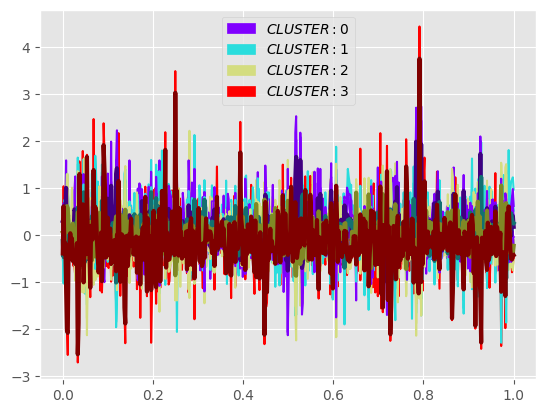

In [184]:
ClusterPlot(kmeans, fd).plot().show()

In [270]:
fuzzy_kmeans = FuzzyCMeans(n_clusters=2, random_state=2)
fuzzy_kmeans.fit(fd)
print(fuzzy_kmeans.predict_proba(fd))

[[0.61323379 0.38676621]
 [0.5750128  0.4249872 ]
 [0.28684394 0.71315606]
 ...
 [0.28612698 0.71387302]
 [0.31046224 0.68953776]
 [0.2495157  0.7504843 ]]


 C:\Users\beret\AppData\Local\Temp\ipykernel_8400\511241479.py:1: UserWarning:Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


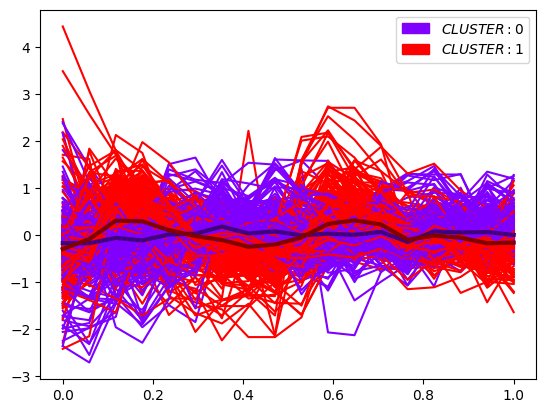

In [271]:
ClusterPlot(fuzzy_kmeans, fd).plot().show()

# Exercise 2 : CT-Scan Dataset

We now consider a real-life transfer scenario using the [CT-Scan dataset](https://archive.ics.uci.edu/ml/datasets/Relative+location+of+CT+slices+on+axial+axis) from the UCI machine leanring repository.

This dataset is composed of more than $50000$ Ct-Scan slices coming from around $100$ different patients. The goal is to predict the relative location of the slice in the patient based on features extracted from the slice (cf Figure below)

![ctscan](ctscan.png)

We consider the following transfer learning scenario, where the learner has access to labeled data for every patients except one:  discard the patient with the more data and consider it as a target patient. We are in the realistic situation where an expert (radiologist) has labeled the data for many patients, but the model is applied on new coming patient for which no labels is available.

In [275]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [276]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00206/slice_localization_data.zip")

print(df.shape)
df.head()

(53500, 386)


,patientId,value0,value1,value2,value3,value4,value5,value6,value7,value8,...,value375,value376,value377,value378,value379,value380,value381,value382,value383,reference
0,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.980381,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.803851
1,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.977008,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.745726
2,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.977008,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.687600
3,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.977008,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.629474
4,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.976833,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.571348


In [277]:
X = df.drop(["patientId", "reference"], axis=1)
y = df["reference"]

In [278]:
source_ids = [i for i in range(97) if i != 46]
target_ids = [46]

In [279]:
X_src = X.loc[df.patientId.isin(source_ids)]
X_tgt = X.loc[df.patientId.isin(target_ids)]

y_src = y.loc[df.patientId.isin(source_ids)]
y_tgt = y.loc[df.patientId.isin(target_ids)]

In [280]:
print("Shape of Xs", X_src.shape)
print("Shape of Xt", X_tgt.shape)

Shape of Xs (51751, 384)
Shape of Xt (1749, 384)


In [282]:
X_train, X_test, y_train, y_test = train_test_split(X_src, y_src, train_size=0.8)

### Question 1

The plots below show the two first components of the PCA of the 384 input features. We compare the difference between the train and test set which are uniform splits of the source dataset and the difference between the source and target dataset.

What do we observe? Can we consider this problem as a transfer learning problem?

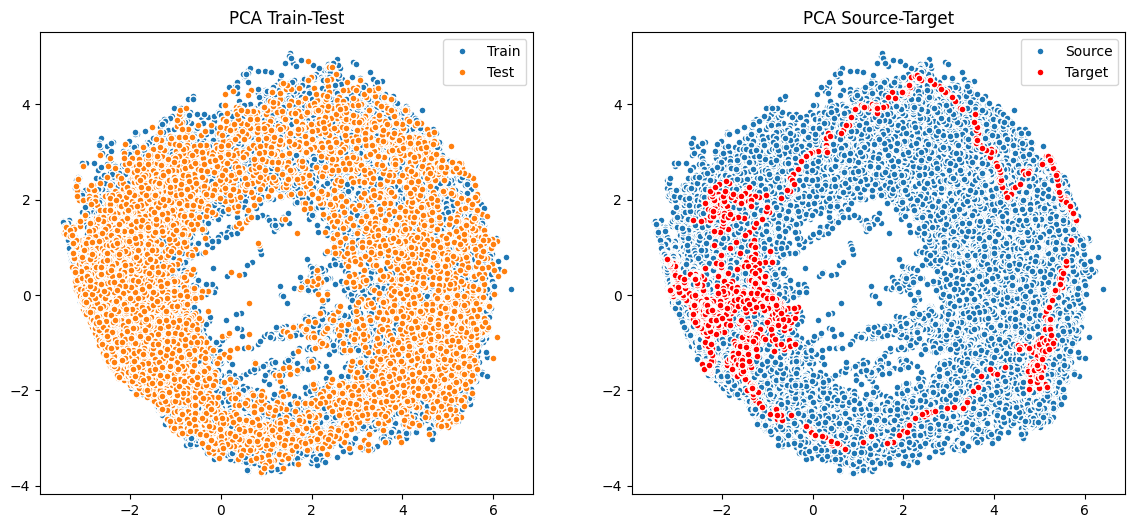

In [283]:
from sklearn.decomposition import PCA

X_pca = PCA(2).fit_transform(X)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.plot(X_pca[X_train.index, 0], X_pca[X_train.index, 1], 'o', label="Train", markeredgecolor="w", ms=5)
ax1.plot(X_pca[X_test.index, 0], X_pca[X_test.index, 1], 'o', label="Test", markeredgecolor="w", ms=5)

ax2.plot(X_pca[X_src.index, 0], X_pca[X_src.index, 1], 'o', label="Source", markeredgecolor="w", ms=5)
ax2.plot(X_pca[X_tgt.index, 0], X_pca[X_tgt.index, 1], 'o', label="Target", markeredgecolor="w", ms=5, c="red")

ax1.legend(); ax2.legend()
ax1.set_title("PCA Train-Test"); ax2.set_title("PCA Source-Target")
plt.show()

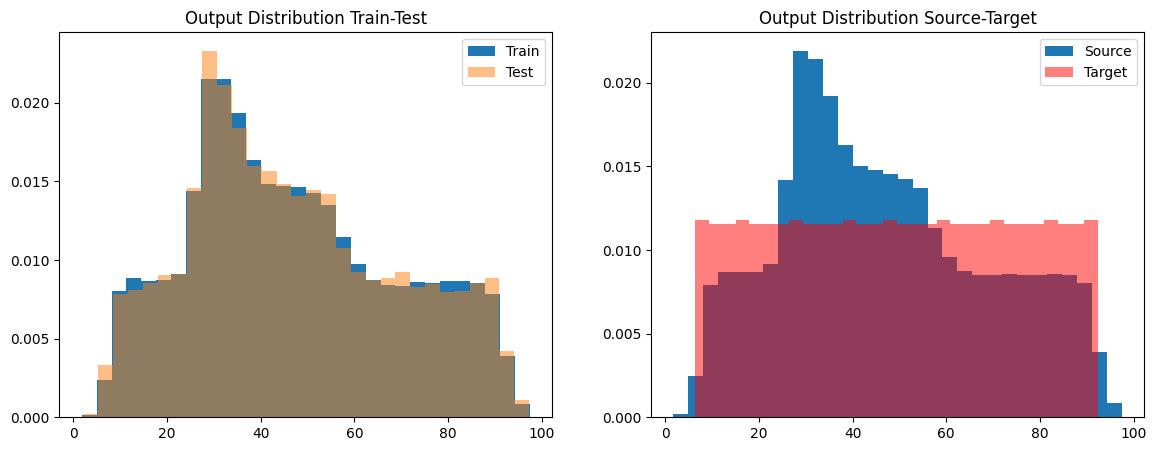

In [284]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.hist(y_train, density=True, bins=30, label="Train")
ax1.hist(y_test, alpha=0.5, density=True, bins=30, label="Test")

ax2.hist(y_src, label="Source", density=True, bins=30)
ax2.hist(y_tgt, label="Target", density=True, bins=30, alpha=0.5, color="red")

ax1.legend(); ax2.legend()
ax1.set_title("Output Distribution Train-Test"); ax2.set_title("Output Distribution Source-Target")

plt.show()

### Question 2

Fir a `Ridge` regression model on the training data and compute the source risk (on the test set) and the target risk.

What can be observed?

In [285]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train,y_train)

Ridge()

In [286]:
yps=model.predict(X_src)
ypt=model.predict(X_tgt)
err_src = np.mean(np.square(y_src-yps))
err_tgt = np.mean(np.square(y_tgt-ypt))

print("Source average squared error : %.4f"%err_src)
print("Target average squared error : %.4f"%err_tgt)

Source average squared error : 65.7417
Target average squared error : 217.7568


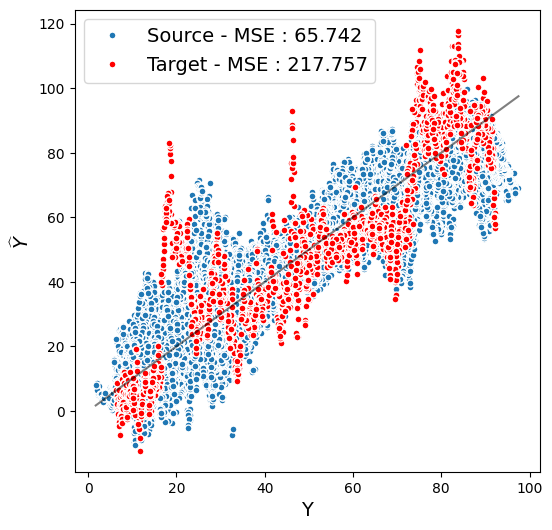

In [287]:
plt.figure(figsize=(6, 6))
plt.plot(y_src, yps, 'o', label="Source - MSE : %.3f"%err_src, markeredgecolor="w", ms=5)
plt.plot(y_tgt, ypt, 'o', label="Target - MSE : %.3f"%err_tgt, markeredgecolor="w", ms=5, c="red")
plt.plot([np.min(y_src), np.max(y_src)], [np.min(y_src), np.max(y_src)], c="k", alpha=0.5)
plt.ylabel(r"$\widehat{Y}$", fontsize=14); plt.xlabel(r"Y", fontsize=14); plt.legend(fontsize=14); plt.show()

In [288]:
F = err_src / err_tgt
pvalue = scipy.stats.f.cdf(F, len(y_src)-1, len(y_tgt)-1)
print("pvalue = %f"%pvalue)

pvalue = 0.000000


### Question 3

Can we consider that the source risk is a good estimation of the target risk? is the covariate-shift assumption realistic in this case?

Non! the pvalue is low than alpha=0.01. We are not on the covariate-shift assumption!

### Question 4 : KDE

We know try to apply KDE to the problem.

Try to compute an estimation of $p_s(x)$ with different source sample sizes. Compute the computational time for each size. What is the complexity of the algorithm?

In [289]:
import time
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [292]:
X_s = X_src.sample(100)

In [57]:
import time

n = 100
t0 = time.time()
X_s = X_src.sample(n)
ps_xs = kde(X_s, X_s)
t1 = time.time()
print("Time %.3f"%(t1-t0))

TypeError: 'KernelDensity' object is not callable

In [ ]:
times = []
n_samples = [100, 500, 1000, 2000, 5000, 10000]

t0 = time.time()

for n in n_samples:
    # ...compute time and append in times

In [ ]:
plt.plot(times, ".")
plt.plot(times[-1] * np.array(n_samples)**2 / n_samples[-1]**2)
plt.show()

### Question 5 : NNW (1)

What is the complexity of the NNW algorithm, is it more adapted than KDE to our problem?

Fit a reweighted Ridge regression using the weights from NNW. Plot the weights on the PCA. What do you observe?

In [60]:
from adapt.instance_based import NearestNeighborsWeighting

nnw = NearestNeighborsWeighting(estimator=Ridge(), Xt=X_tgt, n_neighbors=5)

nnw.fit(X_train, y_train);

Fit weights...
Fit Estimator...


Source average squared error : 215.0428
Target average squared error : 245.0235


ValueError: x and y must have same first dimension, but have shapes (10351,) and (51751,)

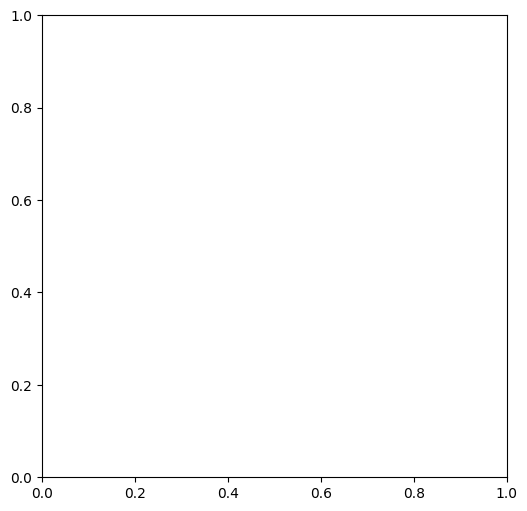

In [62]:
yps1=nnw.predict(X_test)
ypt=nnw.predict(X_tgt)
err_src1 = np.mean(np.square(y_test-yps1))
err_tgt1 = np.mean(np.square(y_tgt-ypt))


print("Source average squared error : %.4f"%err_src1)
print("Target average squared error : %.4f"%err_tgt1)

plt.figure(figsize=(6, 6))
plt.plot(y_test, yps, 'o', label="Source - MSE : %.3f"%err_src, markeredgecolor="w", ms=5)
plt.plot(y_tgt, ypt, 'o', label="Target - MSE : %.3f"%err_tgt, markeredgecolor="w", ms=5, c="red")
plt.plot([np.min(y_src), np.max(y_src)], [np.min(y_src), np.max(y_src)], c="k", alpha=0.5)
plt.ylabel(r"$\widehat{Y}$", fontsize=14); plt.xlabel(r"Y", fontsize=14); plt.legend(fontsize=14); plt.show()

In [ ]:
weights = nnw.weights_
weights /= weights.mean()

X_pca = PCA(2).fit_transform(X)

fig, ax = plt.subplots(1, 1, figsize=(7, 6))

ax.scatter(X_pca[X_train.index, 0], X_pca[X_train.index, 1], label="Source", edgecolor="w", s=5 * weights)
ax.plot(X_pca[X_tgt.index, 0], X_pca[X_tgt.index, 1], 'o', label="Target", markeredgecolor="w", ms=5, c="red")

ax1.legend(); ax2.legend()
ax1.set_title("PCA Train-Test"); ax2.set_title("PCA Source-Target")
plt.show()

### Question 6 : NNW (2)

Try different vlaues of `n_neighbors`. What is the best value?

**(BONUS)** Propose some ideas to select the best value `n_neighbors`

### Question 7 : KLIEP (1)

Try the same thing with KLIEP. Use different values of the `gamma` argument, what do you observe?

In [ ]:
from adapt.instance_based import KLIEP

kliep = KLIEP(estimator=Ridge(), Xt=X_tgt, gamma=1.)

kliep.fit(X_train, y_train);

In [ ]:
yps = # prediction test
ypt = # prediction tgt
err_src = #...
err_tgt = #...

print("Source average squared error : %.4f"%err_src)
print("Target average squared error : %.4f"%err_tgt)

plt.figure(figsize=(6, 6))
plt.plot(y_test, yps, 'o', label="Source - MSE : %.3f"%err_src, markeredgecolor="w", ms=5)
plt.plot(y_tgt, ypt, 'o', label="Target - MSE : %.3f"%err_tgt, markeredgecolor="w", ms=5, c="red")
plt.plot([np.min(y_src), np.max(y_src)], [np.min(y_src), np.max(y_src)], c="k", alpha=0.5)
plt.ylabel(r"$\widehat{Y}$", fontsize=14); plt.xlabel(r"Y", fontsize=14); plt.legend(fontsize=14); plt.show()

In [ ]:
weights = kliep.weights_
weights /= weights.mean()

X_pca = PCA(2).fit_transform(X)

fig, ax = plt.subplots(1, 1, figsize=(7, 6))

ax.scatter(X_pca[X_train.index, 0], X_pca[X_train.index, 1], label="Source", edgecolor="w", s=5 * weights)
ax.plot(X_pca[X_tgt.index, 0], X_pca[X_tgt.index, 1], 'o', label="Target", markeredgecolor="w", ms=5, c="red")

ax1.legend(); ax2.legend()
ax1.set_title("PCA Train-Test"); ax2.set_title("PCA Source-Target")
plt.show()

### Question 8 : KLIEP (2)

Put a list of possible values for gamma, explain what is happening?

In [ ]:
kliep = KLIEP(estimator=Ridge(), Xt=X_tgt, gamma=#...)

kliep.fit(X_train, y_train);

In [ ]:
yps = # prediction test
ypt = # prediction tgt
err_src = #...
err_tgt = #...

print("Source average squared error : %.4f"%err_src)
print("Target average squared error : %.4f"%err_tgt)

plt.figure(figsize=(6, 6))
plt.plot(y_test, yps, 'o', label="Source - MSE : %.3f"%err_src, markeredgecolor="w", ms=5)
plt.plot(y_tgt, ypt, 'o', label="Target - MSE : %.3f"%err_tgt, markeredgecolor="w", ms=5, c="red")
plt.plot([np.min(y_src), np.max(y_src)], [np.min(y_src), np.max(y_src)], c="k", alpha=0.5)
plt.ylabel(r"$\widehat{Y}$", fontsize=14); plt.xlabel(r"Y", fontsize=14); plt.legend(fontsize=14); plt.show()

In [ ]:
weights = kliep.weights_
weights /= weights.mean()

X_pca = PCA(2).fit_transform(X)

fig, ax = plt.subplots(1, 1, figsize=(7, 6))

ax.scatter(X_pca[X_train.index, 0], X_pca[X_train.index, 1], label="Source", edgecolor="w", s=5 * weights)
ax.plot(X_pca[X_tgt.index, 0], X_pca[X_tgt.index, 1], 'o', label="Target", markeredgecolor="w", ms=5, c="red")

ax1.legend(); ax2.legend()
ax1.set_title("PCA Train-Test"); ax2.set_title("PCA Source-Target")
plt.show()